In [1]:
# 導入模組
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
bdata = pd.read_csv('diabetes.csv')

In [5]:
# 移除缺失值
bdata.dropna(inplace=True)

# 檢查資料型態
bdata.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [12]:
import numpy as np

# 計算每個變數的平均值和標準差
means = bdata.mean(axis=0)
stds = bdata.std(axis=0)

# 定義範圍
ranges = np.array([(means[i]-3*stds[i], means[i]+3*stds[i]) for i in range(len(means))])

# 刪除極端值
for i in range(len(bdata)):
    if any(bdata[i] < ranges[:,0]) or any(bdata[i] > ranges[:,1]):
        bdata = np.delete(bdata, i, axis=0)

KeyError: 0

In [16]:
import pandas as pd

# 將數據轉換為Pandas DataFrame
bdata = pd.DataFrame(bdata, columns=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"])

# 計算每個變量的四分位範圍
ranges = np.zeros((len(bdata.columns), 2))
for i, col in enumerate(bdata.columns):
    q1, q3 = bdata[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    ranges[i] = [q1 - (1.5 * iqr), q3 + (1.5 * iqr)]

# 刪除極端值
bdata = bdata[~((bdata < ranges[:, 0]) | (bdata > ranges[:, 1])).any(axis=1)]

In [20]:
import pandas as pd
import numpy as np

# 将 NumPy 数组转换为 Pandas DataFrame
bdata = pd.DataFrame(bdata, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

# 将字符串型数字转换成数字型
bdata = bdata.apply(pd.to_numeric, errors='coerce')

# 计算相关系数矩阵
corr = bdata.corr()

# 打印相关系数矩阵
print(corr)


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.139557       0.185446      -0.094413   
Glucose                      0.139557  1.000000       0.239267      -0.006578   
BloodPressure                0.185446  0.239267       1.000000       0.021854   
SkinThickness               -0.094413 -0.006578       0.021854       1.000000   
Insulin                     -0.115518  0.225018      -0.052080       0.480872   
BMI                          0.030084  0.174505       0.268004       0.373856   
DiabetesPedigreeFunction    -0.008901  0.033642       0.004635       0.162970   
Age                          0.596879  0.252957       0.347596      -0.129556   
Outcome                      0.226409  0.472542       0.173185       0.015414   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.115518  0.030084                 -0.008901   
Glucose                   0.225018  0.174

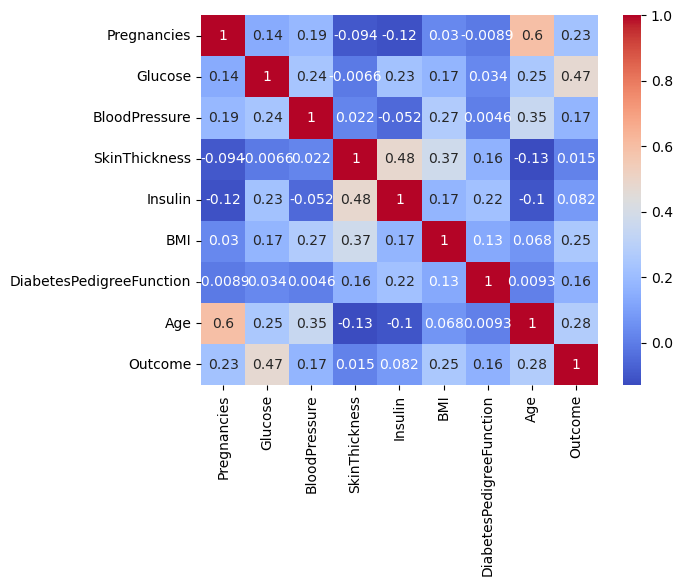

In [52]:
#繪製熱力圖


import seaborn as sns
import matplotlib.pyplot as plt

# 計算相關係數矩陣
corr_matrix = bdata.corr()

# 繪製熱力圖
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# 顯示圖形
plt.show()

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# 定义特征矩阵和目标变量
X = bdata.drop('Outcome', axis=1)
y = bdata['Outcome']

# 定义迭代次数的候选值
max_iters = [10,50,100,500,1000]

# 交叉验证并比较模型性能
best_score = 0
best_iter = 0
for max_iter in max_iters:
    # 定义逻辑回归模型
    lr = LogisticRegression(max_iter=max_iter)
    
    # 执行10折交叉验证
    scores = cross_val_score(lr, X, y, cv=10)
    
    # 计算平均交叉验证得分
    mean_score = scores.mean()
    
    # 比较得分并记录最佳模型
    if mean_score > best_score:
        best_score = mean_score
        best_iter = max_iter

# 输出最佳模型的迭代次数和交叉验证得分
print('Best max_iter:', best_iter)
print('Best cross-validation score:', best_score)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best max_iter: 100
Best cross-validation score: 0.7849453551912567


In [24]:
#找出最適合的迭代次數

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# 定义特征矩阵和目标变量
X = bdata.drop('Outcome', axis=1)
y = bdata['Outcome']

# 定义迭代次数的候选值
max_iters = [60,70,80,90,100,110,120,130,140,150]

# 交叉验证并比较模型性能
best_score = 0
best_iter = 0
for max_iter in max_iters:
    # 定义逻辑回归模型
    lr = LogisticRegression(max_iter=max_iter)
    
    # 执行10折交叉验证
    scores = cross_val_score(lr, X, y, cv=10)
    
    # 计算平均交叉验证得分
    mean_score = scores.mean()
    
    # 比较得分并记录最佳模型
    if mean_score > best_score:
        best_score = mean_score
        best_iter = max_iter

# 输出最佳模型的迭代次数和交叉验证得分
print('Best max_iter:', best_iter)
print('Best cross-validation score:', best_score)



/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best max_iter: 100
Best cross-validation score: 0.7849453551912567


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
#找出最適合的迭代次數

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# 定义特征矩阵和目标变量
X = bdata.drop('Outcome', axis=1)
y = bdata['Outcome']

# 定义迭代次数的候选值
max_iters = [95,96,97,98,99,100,101,102,103,104,105]

# 交叉验证并比较模型性能
best_score = 0
best_iter = 0
for max_iter in max_iters:
    # 定义逻辑回归模型
    lr = LogisticRegression(max_iter=max_iter)
    
    # 执行10折交叉验证
    scores = cross_val_score(lr, X, y, cv=5)
    
    # 计算平均交叉验证得分
    mean_score = scores.mean()
    
    # 比较得分并记录最佳模型
    if mean_score > best_score:
        best_score = mean_score
        best_iter = max_iter

# 输出最佳模型的迭代次数和交叉验证得分
print('Best max_iter:', best_iter)
print('Best cross-validation score:', best_score)



/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best max_iter: 103
Best cross-validation score: 0.7831818181818182


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [40]:
def load_data():
    # 加載數據和標籤的程式碼
    # ...
    return X, y


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 加載數據和標籤
X, y = load_data()

# 切分數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 創建隨機森林分類器
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# 訓練模型
clf.fit(X_train, y_train)

# 預測測試集
y_pred = clf.predict(X_test)

# 計算模型準確率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7851239669421488


In [44]:
# 切分數據集的test_size修改成0.3


def load_data():
    # 加載數據和標籤的程式碼
    # ...
    return X, y


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 加載數據和標籤
X, y = load_data()

# 切分數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 創建隨機森林分類器
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# 訓練模型
clf.fit(X_train, y_train)

# 預測測試集
y_pred = clf.predict(X_test)

# 計算模型準確率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8076923076923077


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 生成随机数据集
X, y = make_regression(n_samples=1000, n_features=10, noise=10)

# 定义模型
model = LinearRegression()

# 计算模型的平均偏差和平均方差
def bias_variance(model, X, y, n_runs=100, test_size=0.2):
    
    # 初始化变量
    error = np.zeros(n_runs)
    bias = np.zeros(n_runs)
    variance = np.zeros(n_runs)
    
    # 进行多次实验
    for i in range(n_runs):
        
        # 切分数据集
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
        
        # 训练模型并预测测试集结果
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # 计算测试误差
        error[i] = mean_squared_error(y_test, y_pred)
        
        # 计算模型的偏差和方差
        y_pred_train = model.predict(X_train)
        bias[i] = np.mean((y_train - y_pred_train) ** 2)
        variance[i] = np.var(y_pred_train)
    
    # 计算平均偏差和平均方差
    avg_error = np.mean(error)
    avg_bias = np.mean(bias)
    avg_var = np.mean(variance)
    
    # 输出结果
    print("平均测试误差: {:.4f}".format(avg_error))
    print("平均偏差: {:.4f}".format(avg_bias))
    print("平均方差: {:.4f}".format(avg_var))

# 计算bias-variance
bias_variance(model, X, y)

平均测试误差: 98.9961
平均偏差: 96.8366
平均方差: 17752.1638


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 將資料分為訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(bdata[['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction','Age']], bdata['Outcome'], test_size=0.2, random_state=42)

# 建立線性回歸模型
model = LinearRegression()

# 訓練模型
model.fit(X_train, y_train)

# 用測試集評估模型
score = model.score(X_test, y_test)

# 輸出模型評估結果
print("模型評估結果: {:.2f}".format(score))

模型評估結果: 0.23
